<a href="https://colab.research.google.com/github/krakowiakpawel9/ml_course/blob/master/ul/11_pca_impl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Spis treści:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Wizualizacja danych](#2)
4. [Algorytm K-średnich](#3)
5. [Wizualizacja klastrów](#4)




### <a name='0'></a> Import bibliotek

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
np.set_printoptions(precision=4, suppress=True, edgeitems=5, linewidth=200)

In [26]:
df_raw = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df = df_raw.copy()
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [29]:
data = df.iloc[:, 1:]
target = df.iloc[:, 0]

data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [30]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: 0, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (133, 13)
X_test shape: (45, 13)


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_train_std

array([[ 0.7431, -0.4397,  1.2253, -0.6387,  0.8491, ..., -0.268 ,  0.8644,  1.3724,  0.4096,  1.8113],
       [-0.7727,  1.782 ,  1.3348,  2.0212,  0.1298, ...,  0.1789, -1.3434, -0.1398,  0.7404, -1.2676],
       [ 0.6804, -0.5669, -0.0159, -0.0953,  0.4175, ...,  0.6079,  0.6952,  0.5743,  0.4096,  2.4792],
       [-1.1987, -0.7959,  0.4952,  0.8771, -1.165 , ..., -1.0188, -0.9966, -0.0978,  0.8368, -1.2024],
       [-0.7727, -0.6093, -0.6365,  0.8771,  0.5614, ...,  0.0001, -1.3519,  0.4483,  0.5198, -1.3328],
       ...,
       [-0.2716,  0.8831, -0.235 ,  0.0191, -0.8773, ..., -1.144 ,  2.1163, -0.9799, -1.148 , -0.225 ],
       [-0.2341,  0.7983,  0.7872,  0.7341,  0.4175, ..., -1.1619,  0.1369, -0.3498, -0.6518, -0.5997],
       [ 0.0165, -0.4737, -0.9651, -0.6959,  0.4895, ...,  0.751 , -0.0915, -0.3078,  1.0574,  0.4266],
       [ 0.0541,  1.3326, -0.0159,  0.5911,  0.9211, ..., -0.8401,  1.7526, -1.61  , -1.7269, -0.6649],
       [ 1.0062,  1.5191,  0.0571,  0.0191, -0.8053,

In [52]:
cov_mat = np.cov(X_train_std.T)
cov_mat

array([[ 1.0076,  0.0606,  0.2018, -0.3215,  0.2168,  0.309 ,  0.2448, -0.1337,  0.1605,  0.5217, -0.123 ,  0.0945,  0.632 ],
       [ 0.0606,  1.0076,  0.1735,  0.3346, -0.0951, -0.3596, -0.4311,  0.3638, -0.229 ,  0.2518, -0.5838, -0.3853, -0.2056],
       [ 0.2018,  0.1735,  1.0076,  0.4877,  0.241 ,  0.1021,  0.0827,  0.2192, -0.0199,  0.2428, -0.1222, -0.0104,  0.1842],
       [-0.3215,  0.3346,  0.4877,  1.0076, -0.0397, -0.3051, -0.3576,  0.3813, -0.2206,  0.0421, -0.2699, -0.2808, -0.4736],
       [ 0.2168, -0.0951,  0.241 , -0.0397,  1.0076,  0.1734,  0.1761, -0.2555,  0.1763,  0.1825,  0.0068,  0.0731,  0.3555],
       [ 0.309 , -0.3596,  0.1021, -0.3051,  0.1734,  1.0076,  0.8606, -0.4528,  0.6127, -0.0681,  0.4165,  0.7316,  0.4839],
       [ 0.2448, -0.4311,  0.0827, -0.3576,  0.1761,  0.8606,  1.0076, -0.5813,  0.6425, -0.1975,  0.5447,  0.8184,  0.4729],
       [-0.1337,  0.3638,  0.2192,  0.3813, -0.2555, -0.4528, -0.5813,  1.0076, -0.3915,  0.2022, -0.317 , -0.5671, -0

In [0]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [54]:
eigen_vals

array([4.7947, 2.4749, 1.4808, 0.9681, 0.8714, 0.6559, 0.5011, 0.1045, 0.3242, 0.3123, 0.1641, 0.2342, 0.2124])

In [56]:
eigen_vecs

array([[-0.1327, -0.4931,  0.1911, -0.1039,  0.2605,  0.1897, -0.1334,  0.0484,  0.2382, -0.6155, -0.1556,  0.2542, -0.209 ],
       [ 0.2642, -0.1936, -0.1004, -0.4078, -0.2411,  0.6196,  0.3838, -0.0192,  0.0523, -0.0143,  0.0054, -0.1639,  0.311 ],
       [ 0.0346, -0.3029, -0.6257,  0.1217,  0.2869,  0.0684, -0.1323, -0.1759,  0.1044,  0.329 ,  0.0093,  0.4486,  0.212 ],
       [ 0.2449,  0.0239, -0.6131, -0.0067, -0.1029, -0.0846, -0.255 ,  0.1558,  0.1907, -0.2668, -0.1175, -0.4996, -0.2924],
       [-0.1147, -0.2768, -0.1346,  0.7006, -0.432 ,  0.0562,  0.3444,  0.0255, -0.2001, -0.217 ,  0.0531,  0.0403, -0.026 ],
       [-0.3856, -0.0986, -0.17  , -0.2394,  0.0264, -0.0846, -0.0068, -0.4278, -0.5631, -0.1057, -0.4408, -0.1948,  0.0632],
       [-0.4194, -0.0232, -0.1659, -0.1594, -0.0011,  0.0059, -0.052 ,  0.8157, -0.2021,  0.022 , -0.0036,  0.0493,  0.2422],
       [ 0.3165, -0.0427, -0.1257, -0.1238,  0.4678, -0.3054,  0.6083,  0.1439, -0.2903, -0.1284,  0.1387,  0.044 , -0

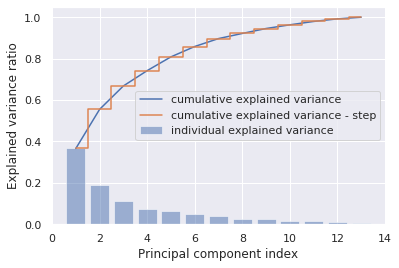

In [69]:
# skumulowana suma wariancji
total = sum(eigen_vals)
var_exp = [(i / total) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.plot(range(1,14), cum_var_exp, label='cumulative explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance - step')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend()
plt.show()

In [0]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [72]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.1327 -0.4931]
 [ 0.2642 -0.1936]
 [ 0.0346 -0.3029]
 [ 0.2449  0.0239]
 [-0.1147 -0.2768]
 [-0.3856 -0.0986]
 [-0.4194 -0.0232]
 [ 0.3165 -0.0427]
 [-0.302  -0.0812]
 [ 0.114  -0.5244]
 [-0.2965  0.3109]
 [-0.3877  0.1273]
 [-0.2666 -0.3794]]


In [73]:
X_train_std[0].dot(w)

array([-2.1946, -1.6344])

In [74]:
X_train_std.dot(w)

array([[-2.1946, -1.6344],
       [ 1.1489,  0.8529],
       [-2.6297, -1.5355],
       [ 0.4031,  2.0017],
       [ 0.018 ,  2.0283],
       [-1.3174, -0.6054],
       [-1.0737, -0.1664],
       [ 0.3819,  2.3643],
       [ 2.6868, -0.2182],
       [ 2.2224, -0.1383],
       [ 2.1878, -0.8399],
       [-1.9158,  1.2611],
       [ 1.6904,  1.3366],
       [-2.5072, -0.2445],
       [ 2.7207, -2.433 ],
       [-0.5638,  3.9403],
       [ 1.3926,  1.6201],
       [-0.4937, -0.2595],
       [ 2.4382, -2.0576],
       [ 0.3677,  1.9768],
       [-1.3671, -0.6534],
       [ 1.6573, -2.3251],
       [ 0.6203,  1.1998],
       [ 0.5452,  0.6437],
       [ 2.3553, -1.9958],
       [ 1.5014,  1.0841],
       [-2.2422,  0.2886],
       [-0.8989,  3.4244],
       [ 1.7721,  1.0409],
       [-2.8121, -0.8269],
       [ 0.5939,  2.133 ],
       [ 1.8442,  1.6813],
       [ 0.5017,  2.5315],
       [-0.5139,  2.2218],
       [-1.768 ,  0.2886],
       [ 0.8013,  0.3594],
       [ 3.9349, -0.2755],
 